In [7]:
import pandas as pd
sal = pd.read_csv('Salaries.csv')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


### Name of lowest paid person? 

In [128]:
sal[sal['TotalPayBenefits']== sal['TotalPayBenefits'].min()]
# However the salary is in negative in most of the columns.

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [127]:
sal[(sal['TotalPayBenefits']>0) & (sal['OtherPay']>0) & (sal['BasePay']>0) & (sal['OvertimePay']>0)].min()
#Columns with value more than 0 can be checked.

Id                                2
EmployeeName        AARON BALLONADO
JobTitle              ACCOUNT CLERK
BasePay                       31.36
OvertimePay                    0.02
OtherPay                       0.59
Benefits                        0.0
TotalPay                     192.43
TotalPayBenefits             192.43
Year                           2011
Notes                           NaN
Agency                San Francisco
Status                          NaN
dtype: object

### How is the salary distribution in TotalPayBenefits?

In [ ]:
salary_positive= sal[(sal['TotalPayBenefits']>0) & (sal['OtherPay']>0) & (sal['BasePay']>0) & (sal['OvertimePay']>0)]
#salary with positive pay in all the pay columns.

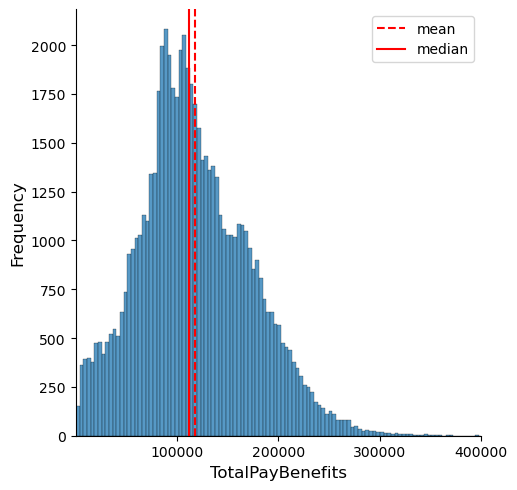

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
salary_plot=sns.displot(salary_positive,x=salary_positive['TotalPayBenefits'],height=5)
plt.xlabel("TotalPayBenefits", size=12)
plt.xticks([100000, 200000, 300000,400000])
plt.xlim(0, 400000)
plt.ylabel("Frequency", size=12)
salary_mean=plt.axvline(x=salary_positive['TotalPayBenefits'].mean(), ls='--',color='red')
salary_median=plt.axvline(x=salary_positive['TotalPayBenefits'].median(),color='red')
plt.legend(['mean', 'median'], loc='upper right')
plt.show()
#mean greater than median, somewhat positively skewed.

### What is the average base pay per year of people with word Officer in their job title?

In [76]:
def officer(title):
    if 'officer' in title.lower():
        return True
    else:
        return False
#people with word officer in their title defined in function

In [126]:
sal_officer=sal[sal['JobTitle'].apply(lambda x: officer(x))]
sal_officer
#defined function used to extract the data with officer in title and stored in sal_officer

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
111,112,C PETRUZZELLA,POLICE OFFICER III,63811.18,57966.33,98578.97,NaN,220356.48,220356.48,2011,NaN,San Francisco,NaN
224,225,RAYMOND KOENIG,POLICE OFFICER I,63625.16,41441.44,97799.84,NaN,202866.44,202866.44,2011,NaN,San Francisco,NaN
228,229,SAM YUEN,POLICE OFFICER II,110242.81,16939.01,75533.10,NaN,202714.92,202714.92,2011,NaN,San Francisco,NaN
244,245,MICHAEL SIMMONS,POLICE OFFICER III,112441.80,17715.27,71120.05,NaN,201277.12,201277.12,2011,NaN,San Francisco,NaN
263,264,THOMAS CUNNANE,POLICE OFFICER III,112421.46,14978.42,72362.09,NaN,199761.97,199761.97,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148409,148410,Dennis V Cravalho,Police Officer,0.00,0.00,242.66,0.0,242.66,242.66,2014,NaN,San Francisco,NaN
148437,148438,Elizabeth A Maron,Police Officer 3,0.00,0.00,212.39,0.0,212.39,212.39,2014,NaN,San Francisco,NaN
148544,148545,Getachew K Gebremariam,Bldg & Grounds Patrol Officer,0.00,0.00,96.35,0.0,96.35,96.35,2014,NaN,San Francisco,NaN
148640,148641,Charlene D Mccully,Parking Control Officer,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN


In [125]:
pd.DataFrame(sal_officer.groupby('Year').mean()['BasePay'])
#the average pay of people with title officer 

,BasePay
Year,
2011,87636.076021
2012,86627.281860
2013,92689.369614
2014,85368.957589
